In [3]:
!pip install -r "requirements.txt"

In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [7]:
df = pd.read_csv("data.csv")

# Initial exploration

In [8]:
df.columns

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY',
       'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE',
       'FIPS_NAME', 'Shape'],
      dtype='object')

In [9]:
df['SOURCE_SYSTEM_TYPE'].value_counts()

SOURCE_SYSTEM_TYPE
NONFED       5179
FED          2032
INTERAGCY      13
Name: count, dtype: int64

In [10]:
df['SOURCE_SYSTEM'].value_counts()

SOURCE_SYSTEM
ST-NASF        2673
DOI-WFMI        983
FS-FIRESTAT     970
ST-CACDF        347
ST-MSMSS        276
ST-NCNCS        268
ST-GAGAS        264
ST-TXTXS        246
ST-ALALS        233
ST-FLFLS        182
ST-SCSCS        129
FWS-FMIS         79
ST-ORORS         77
ST-WIWIS         68
ST-LALAS         66
ST-TNTNS         66
ST-ARARS         47
ST-WAWAS         45
ST-MOMOS         43
ST-VAVAS         39
ST-KYKYS         29
ST-OKOKS         26
ST-SDSDS         12
IA-AKACC         12
ST-CTCTS         11
ST-COCOS          9
ST-AZAZS          9
FA-NFIRS          6
ST-MIMIS          5
ST-MEMES          3
IA-ICS209         1
Name: count, dtype: int64

In [11]:
df['NWCG_REPORTING_AGENCY'].value_counts()

NWCG_REPORTING_AGENCY
ST/C&L    5191
FS         970
BIA        502
BLM        392
FWS         80
NPS         68
TRIBE       21
Name: count, dtype: int64

In [12]:
pd.DataFrame(df["SOURCE_REPORTING_UNIT"].value_counts())

,count
SOURCE_REPORTING_UNIT,
GAGAS,412
MSMSS,162
FLFLS,157
TXTXS,155
TXVFD,145
...,...
NMN5S,1
NY2707,1
NY4410,1


<Axes: >

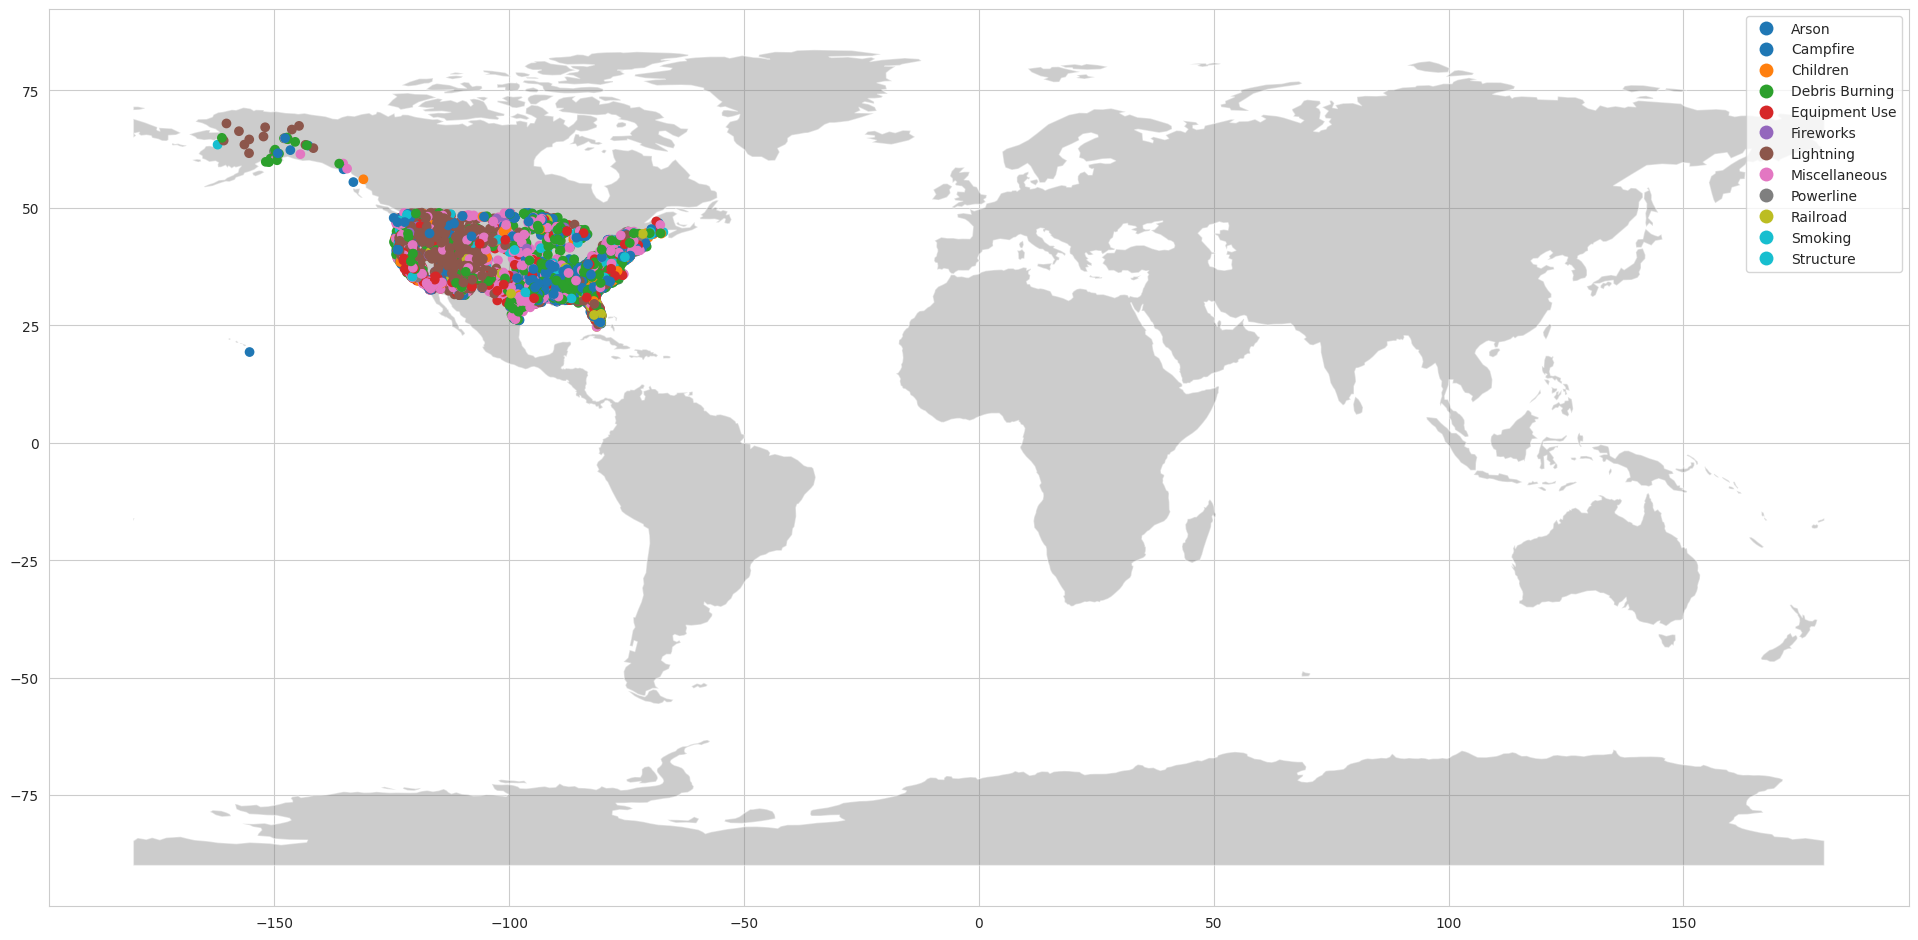

In [13]:
!pip install geodatasets
import geopandas
from geodatasets import get_path
geometry = geopandas.points_from_xy(df.LONGITUDE, df.LATITUDE)
geo_df = geopandas.GeoDataFrame(
    df[["LATITUDE", "LONGITUDE", "STAT_CAUSE_DESCR"]], geometry=geometry
)
world = geopandas.read_file(get_path("naturalearth.land"))
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="STAT_CAUSE_DESCR", ax=ax, legend=True)

In [14]:
# Discovery_date
# converting to usable format
# df['DISCOVERY_DATE'] = pd.to_datetime(df['FIRE_YEAR'].astype(str) + df['DISCOVERY_DOY'].astype(str), format='%Y%j')
# df['DISCOVERY_DATE'].value_counts()

In [15]:
df['DISCOVERY_DATE'].isna().sum()

0

In [16]:
# discovery_time
df['DISCOVERY_TIME'].isna().sum() / len(df)

0.437015503875969

In [17]:
# discovery_time
df['DISCOVERY_TIME'].value_counts()

DISCOVERY_TIME
1500.0    99
1400.0    79
1600.0    79
1200.0    70
1300.0    68
          ..
2001.0     1
2235.0     1
1906.0     1
959.0      1
2051.0     1
Name: count, Length: 866, dtype: int64

In [18]:
# CONT_DATE
# converting to usable format

df['CONT_DATE'].isna().sum() / len(df)

# we note that many values are empty, we need to decide what to do with this

0.45514950166112955

possible feature engineering for discovery_date, discovery_time and cont_date, and generally time-related features:

- season of the year.
- how long the fire went on for (minutes, hours).
- day of the week (weekend, etc).
- is it a holiday.


In [19]:
# fire_size
df['FIRE_SIZE'].isna().sum()

# no cleaning needed.

0

In [20]:
df['FIRE_SIZE'].value_counts()

FIRE_SIZE
0.10      1771
1.00       863
2.00       414
0.50       399
0.20       283
          ... 
43.50        1
4.19         1
122.00       1
5.91         1
17.20        1
Name: count, Length: 618, dtype: int64

In [21]:
# fire size class
df["FIRE_SIZE_CLASS"].isna().sum()

# no empty values


0

In [22]:
df["FIRE_SIZE_CLASS"].value_counts()

FIRE_SIZE_CLASS
B    3597
A    2569
C     847
D     117
E      55
F      30
G       9
Name: count, dtype: int64

In [23]:
# since we want it to be an ordinal features we will convert it to ordinal numbers
df['FIRE_SIZE_CLASS'] = df['FIRE_SIZE_CLASS'].replace(to_replace=['A', 'B', 'C', 'D', 'E', 'F', 'G'], value=[0,1,2,3,4,5,6])

In [24]:
# latitude and longitude
df["LATITUDE"].isna().sum()

0

In [25]:
df["LONGITUDE"].isna().sum()

0

possible feature engineering for latitude and longitude:
- check if it is a forest, a desert, a living area

In [26]:
# OWNER_DESCR
df["OWNER_DESCR"].value_counts()

# we have many missing values, need to decide what to do

OWNER_DESCR
MISSING/NOT SPECIFIED    3789
PRIVATE                  1219
USFS                      831
BIA                       445
STATE OR PRIVATE          313
BLM                       283
STATE                     124
NPS                        58
FWS                        58
TRIBAL                     37
OTHER FEDERAL              27
MUNICIPAL/LOCAL            19
UNDEFINED FEDERAL          13
COUNTY                      7
BOR                         1
Name: count, dtype: int64

In [27]:
# STATE
df["STATE"].value_counts()

# all looks good

STATE
CA    746
GA    705
TX    581
NC    390
FL    371
MS    330
NY    298
AL    280
AZ    278
SC    259
OR    249
MN    177
MT    160
WA    153
NM    153
WI    147
ID    146
AR    137
TN    132
CO    121
OK    119
LA    109
SD    106
KY    100
UT     93
VA     92
NJ     91
WV     90
MO     85
NV     78
ND     58
WY     57
AK     51
NE     46
PA     44
KS     35
MI     34
ME     22
MD     15
CT     15
OH     14
MA     12
IA     11
NH      9
IL      8
IN      7
RI      4
VT      4
HI      1
DE      1
Name: count, dtype: int64

In [28]:
# county
pd.DataFrame(df["COUNTY"].value_counts())

,count
COUNTY,
Marion,40
Washington,38
Lincoln,31
5,31
SUFFOLK,31
...,...
Giles,1
Richland County,1
Glynn,1


In [29]:
df["COUNTY"].isna().sum() / len(df)
# many na values, need to decide what to do

0.3748615725359911

In [30]:
df['FIPS_NAME'].isna().sum() / len(df)

0.3748615725359911

In [31]:
df['FIPS_CODE'].isna().sum() / len(df)

0.3748615725359911

In [32]:
df['FIPS_CODE'] = df['FIPS_CODE'].astype(str)

In [34]:
pd.DataFrame(df['FIPS_NAME'].value_counts())

,count
FIPS_NAME,
Marion,54
Washington,47
Lincoln,44
Jefferson,37
Suffolk,33
...,...
Allen,1
Powhatan,1
Durham,1


In [35]:
#STAT_CAUSE_DESCR
# rename column to more reflective name

columns_renaming = {'STAT_CAUSE_DESCR': "FIRE_CAUSE"}
df = df.rename(columns=columns_renaming)

In [36]:
# NWCG_REPORTING_AGENCY
pd.DataFrame(df["NWCG_REPORTING_AGENCY"].value_counts())

,count
NWCG_REPORTING_AGENCY,
ST/C&L,5191
FS,970
BIA,502
BLM,392
FWS,80
NPS,68
TRIBE,21


In [37]:
pd.DataFrame(df["FIRE_CODE"].value_counts())

,count
FIRE_CODE,
D44Z,33
5555,30
D5GJ,17
0001,14
EKT5,8
...,...
0631,1
6188,1
A272,1


In [38]:
df['FIRE_CODE'] = df['FIRE_CODE'].astype(str)

In [39]:
pd.DataFrame(df["FIRE_NAME"].value_counts())

,count
FIRE_NAME,
UNKNOWN,13
GRASS FIRE,10
LOCAL,7
LOCAL FIRE,7
POWERLINE,6
...,...
STICKY WICKET,1
SLU-1829,1
RL312,1


In [40]:
pd.DataFrame(df["COMPLEX_NAME"].value_counts())

,count
COMPLEX_NAME,
CASCADE COMPLEX,1
TILLER COMPLEX,1
CARRIZO COMPLEX,1
YAAK-RED DRAGON COMPLEX,1
SOUTHERN NEVADA COMPLEX,1
EGLEY COMPLEX,1
WESTSIDE COMPLEX,1
ELK COMPLEX,1
MHRD COMPLEX,1


FIRE_YEAR: clean, no feature engineering.


---


DISCOVERY_DATE: clean.
CONT_DATE: many empty values.for baseline model we wont use.

possible feature engineering for discovery_date and cont_date, and generally time-related features:

- season of the year.
- how long the fire went on for (minutes, hours).
- day of the week (weekend, etc).
- is it a holiday.
- time of day category (evening, earkly morning etc)


---


FIRE_SIZE: clean. no feature engineering needed.

FIRE_SIZE_CLASS: converted to ordinal.

---

LATITUDE: clean.

LONGITUDE: clean.

possible feature engineering for latitude and longitude:
- check if it is a forest, a desert, a living area.



---

OWNER_DESCR: half empty. need to decide what to do.


---

STATE: clean. no feature engineering.


---

COUNTY, FIPS_CODE, FIPS_NAME: all reflect the same information. the most usable is FIPS_NAME because it does not mix types of numbers and strings.

FIPS_NAME: requires looking over the values and doing some cleaning (ex. lawrence vs. st. lawrence). also many empty values, need to decide what to do.


---
NWCG_REPORTING_AGENCY: not sure


---

FIRE_CODE: not sure



---


FIRE_NAME: not sure


---
COMPLEX_NAME: not sure. can maybe describe if this is a living area.


# Data visualization

In [41]:
fire_cause_by_states = df.groupby(['STATE', 'FIRE_CAUSE']).size().reset_index(name='count')
fire_cause_by_states

,STATE,FIRE_CAUSE,count
0,AK,Campfire,7
1,AK,Children,2
2,AK,Debris Burning,17
3,AK,Equipment Use,2
4,AK,Lightning,13
...,...,...,...
394,WY,Fireworks,1
395,WY,Lightning,32
396,WY,Miscellaneous,5
397,WY,Railroad,1


## Plots

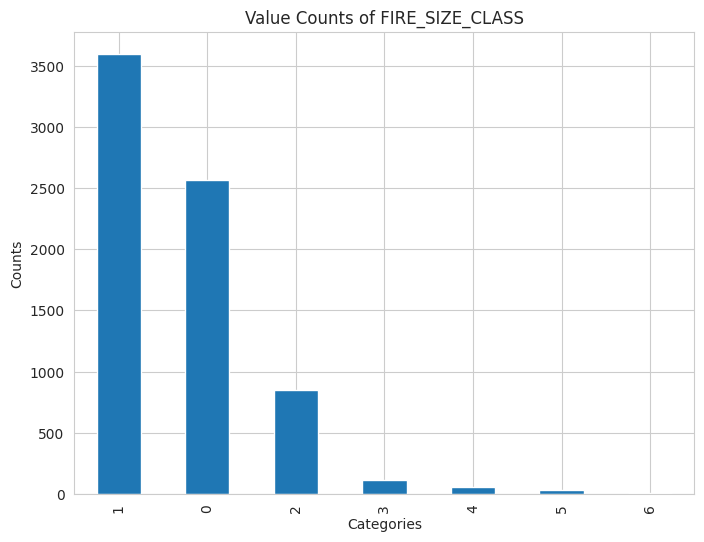

In [43]:
plt.figure(figsize=(8, 6))
df['FIRE_SIZE_CLASS'].value_counts().plot(kind='bar')
plt.title('Value Counts of FIRE_SIZE_CLASS')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

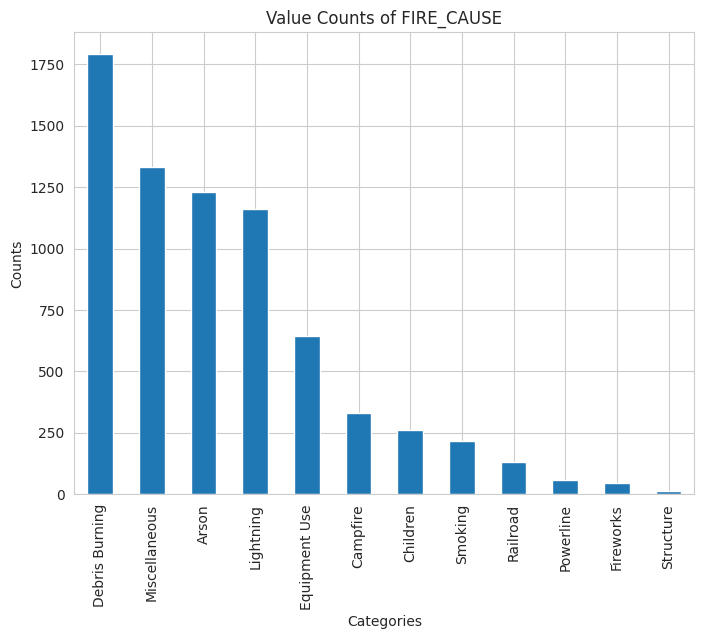

In [44]:
plt.figure(figsize=(8, 6))
df['FIRE_CAUSE'].value_counts().plot(kind='bar')
plt.title('Value Counts of FIRE_CAUSE')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

In [45]:
fire_size_bt_cause = df.groupby('FIRE_CAUSE')['FIRE_SIZE'].mean().sort_values(ascending=False)
fig = px.bar(fire_size_bt_cause, title="mean of the fire size grouped by fire cause")
fig.show()

### relationships between state -> fire cause

In [46]:
total_counts_by_state = fire_cause_by_states.groupby('STATE')['count'].transform('sum')
fire_cause_by_states['cause_percentage'] = (fire_cause_by_states['count'] / total_counts_by_state) * 100
fire_cause_by_states['cause_percentage'] = fire_cause_by_states['cause_percentage'].round(2)
pd.DataFrame(fire_cause_by_states)

,STATE,FIRE_CAUSE,count,cause_percentage
0,AK,Campfire,7,13.73
1,AK,Children,2,3.92
2,AK,Debris Burning,17,33.33
3,AK,Equipment Use,2,3.92
4,AK,Lightning,13,25.49
...,...,...,...,...
394,WY,Fireworks,1,1.75
395,WY,Lightning,32,56.14
396,WY,Miscellaneous,5,8.77
397,WY,Railroad,1,1.75


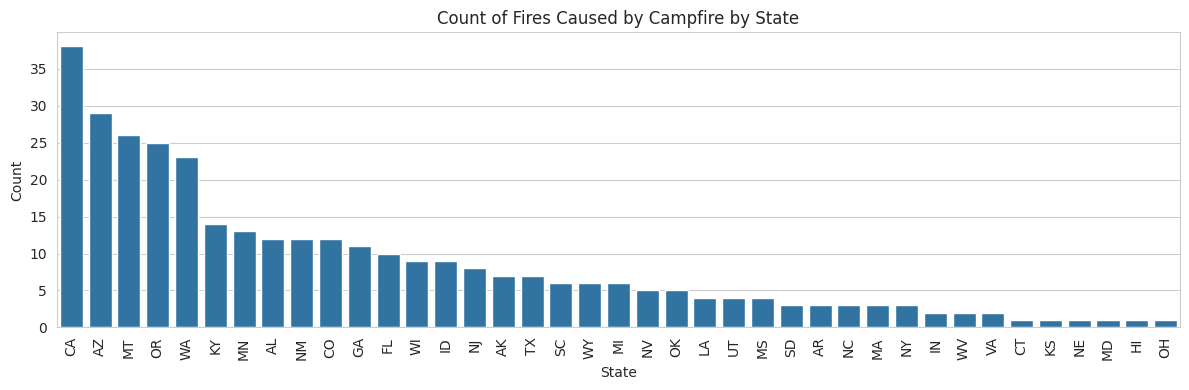

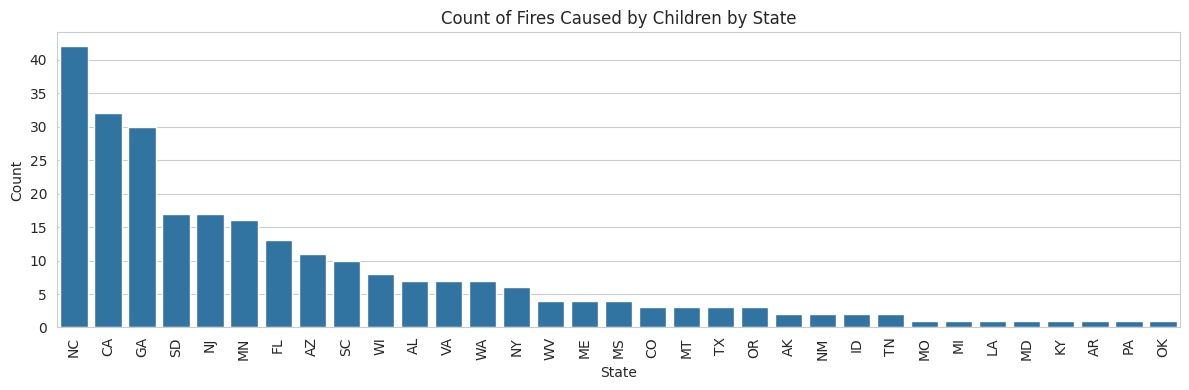

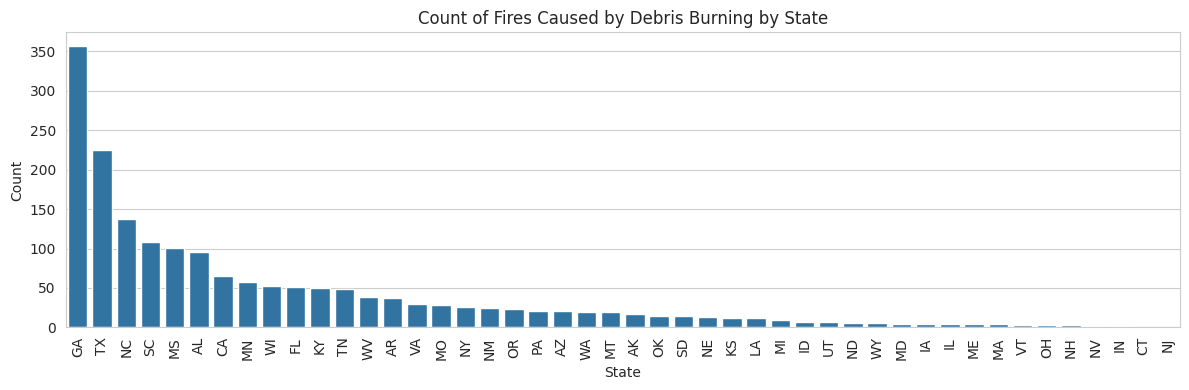

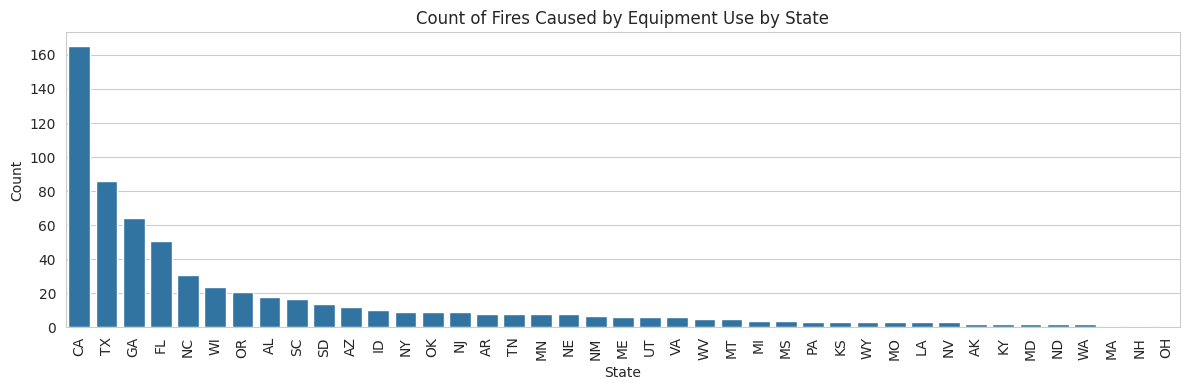

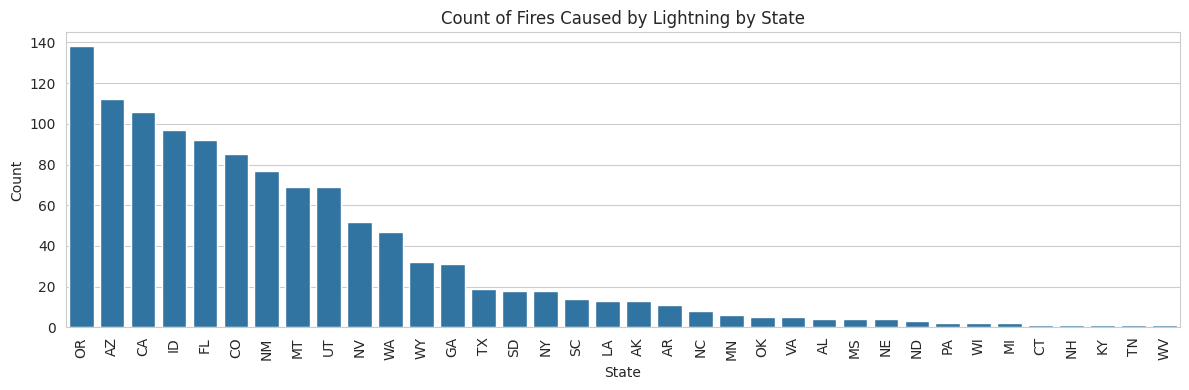

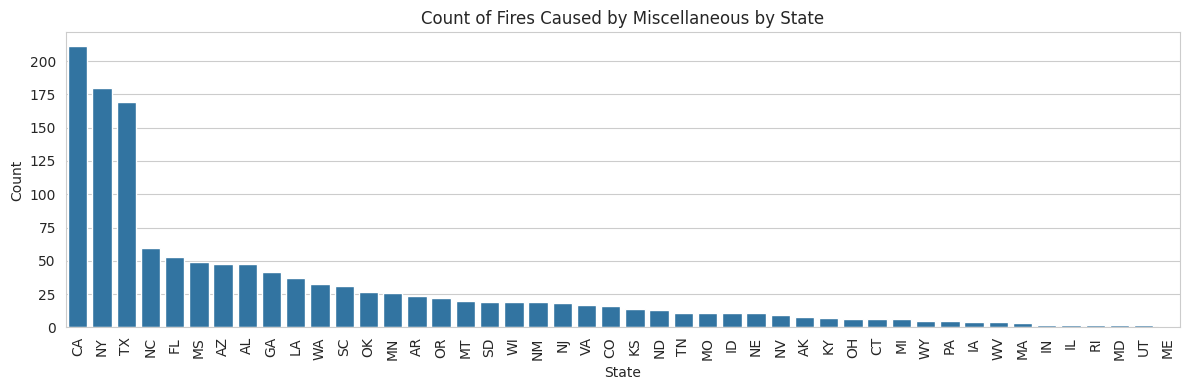

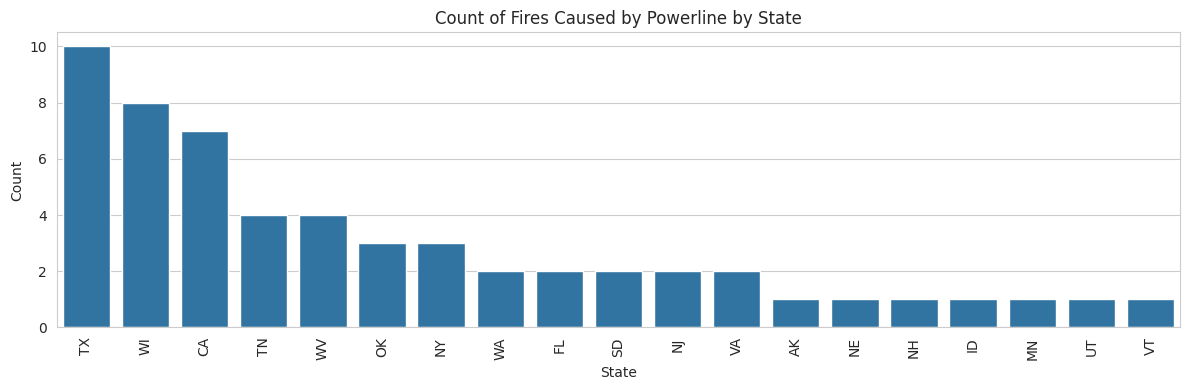

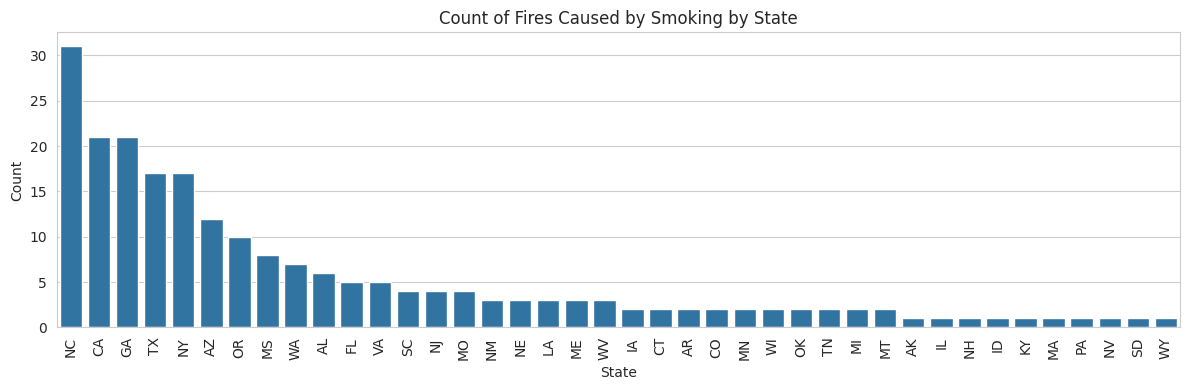

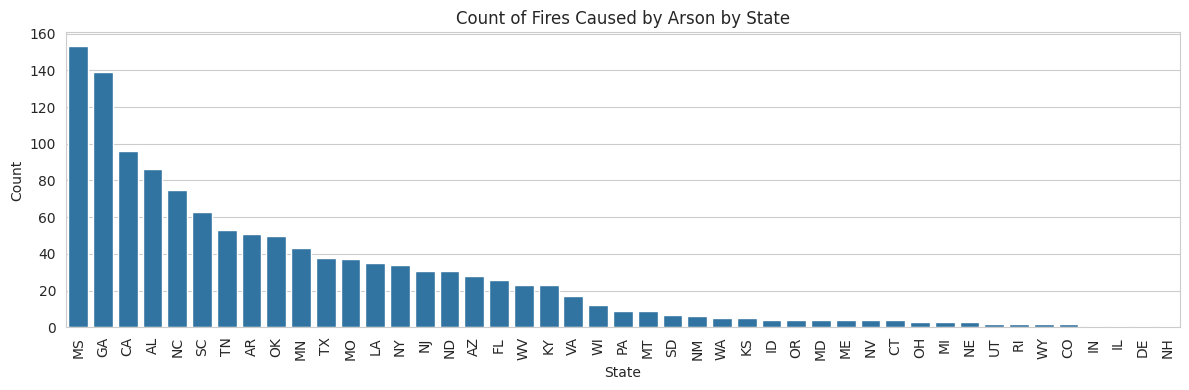

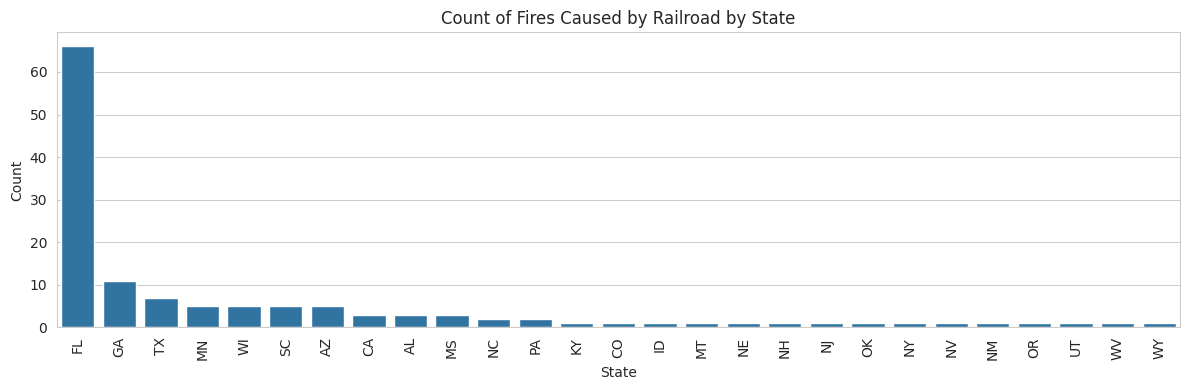

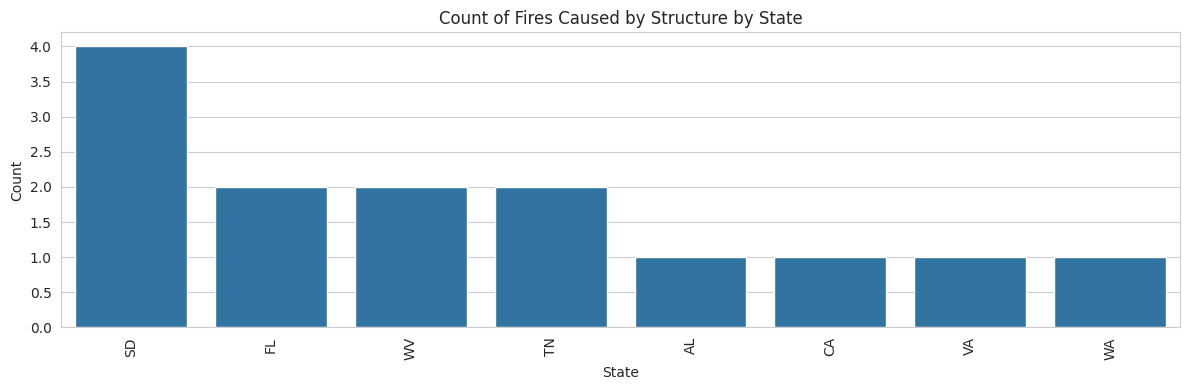

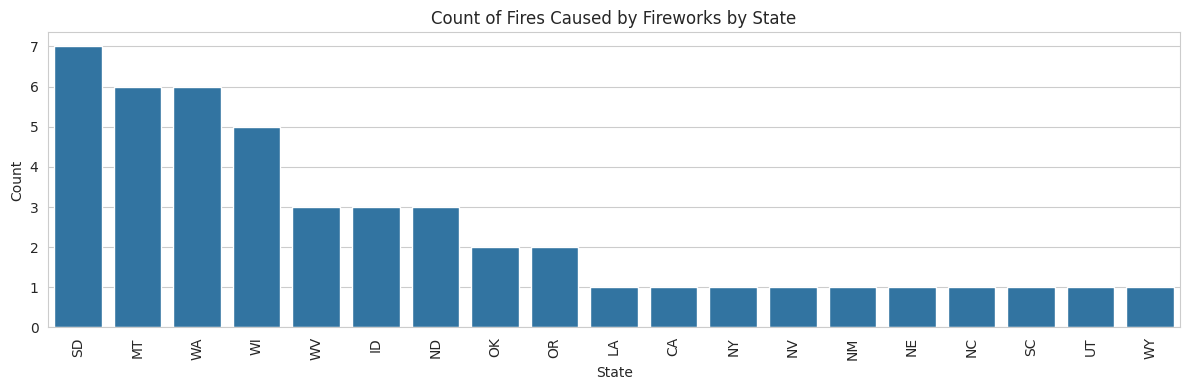

In [47]:
causes = fire_cause_by_states['FIRE_CAUSE'].unique()
for cause in causes:
    cause_data = fire_cause_by_states[fire_cause_by_states['FIRE_CAUSE'] == cause]
    cause_data = cause_data.sort_values(by='count', ascending=False)
    plt.figure(figsize=(12, 4))
    sns.barplot(x='STATE', y='count', data=cause_data)
    plt.title(f'Count of Fires Caused by {cause} by State')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
pivot_df = fire_cause_by_states.pivot(index='STATE', columns='FIRE_CAUSE', values='cause_percentage').fillna(0)
pivot_df

FIRE_CAUSE,Arson,Campfire,Children,Debris Burning,Equipment Use,Fireworks,Lightning,Miscellaneous,Powerline,Railroad,Smoking,Structure
STATE,,,,,,,,,,,,
AK,0.00,13.73,3.92,33.33,3.92,0.00,25.49,15.69,1.96,0.00,1.96,0.00
AL,30.71,4.29,2.50,33.93,6.43,0.00,1.43,17.14,0.00,1.07,2.14,0.36
AR,37.23,2.19,0.73,27.01,5.84,0.00,8.03,17.52,0.00,0.00,1.46,0.00
AZ,10.07,10.43,3.96,7.55,4.32,0.00,40.29,17.27,0.00,1.80,4.32,0.00
CA,12.87,5.09,4.29,8.71,22.12,0.13,14.21,28.28,0.94,0.40,2.82,0.13
CO,1.65,9.92,2.48,0.00,0.00,0.00,70.25,13.22,0.00,0.83,1.65,0.00
CT,26.67,6.67,0.00,6.67,0.00,0.00,6.67,40.00,0.00,0.00,13.33,0.00
DE,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
FL,7.01,2.70,3.50,13.75,13.75,0.00,24.80,14.29,0.54,17.79,1.35,0.54


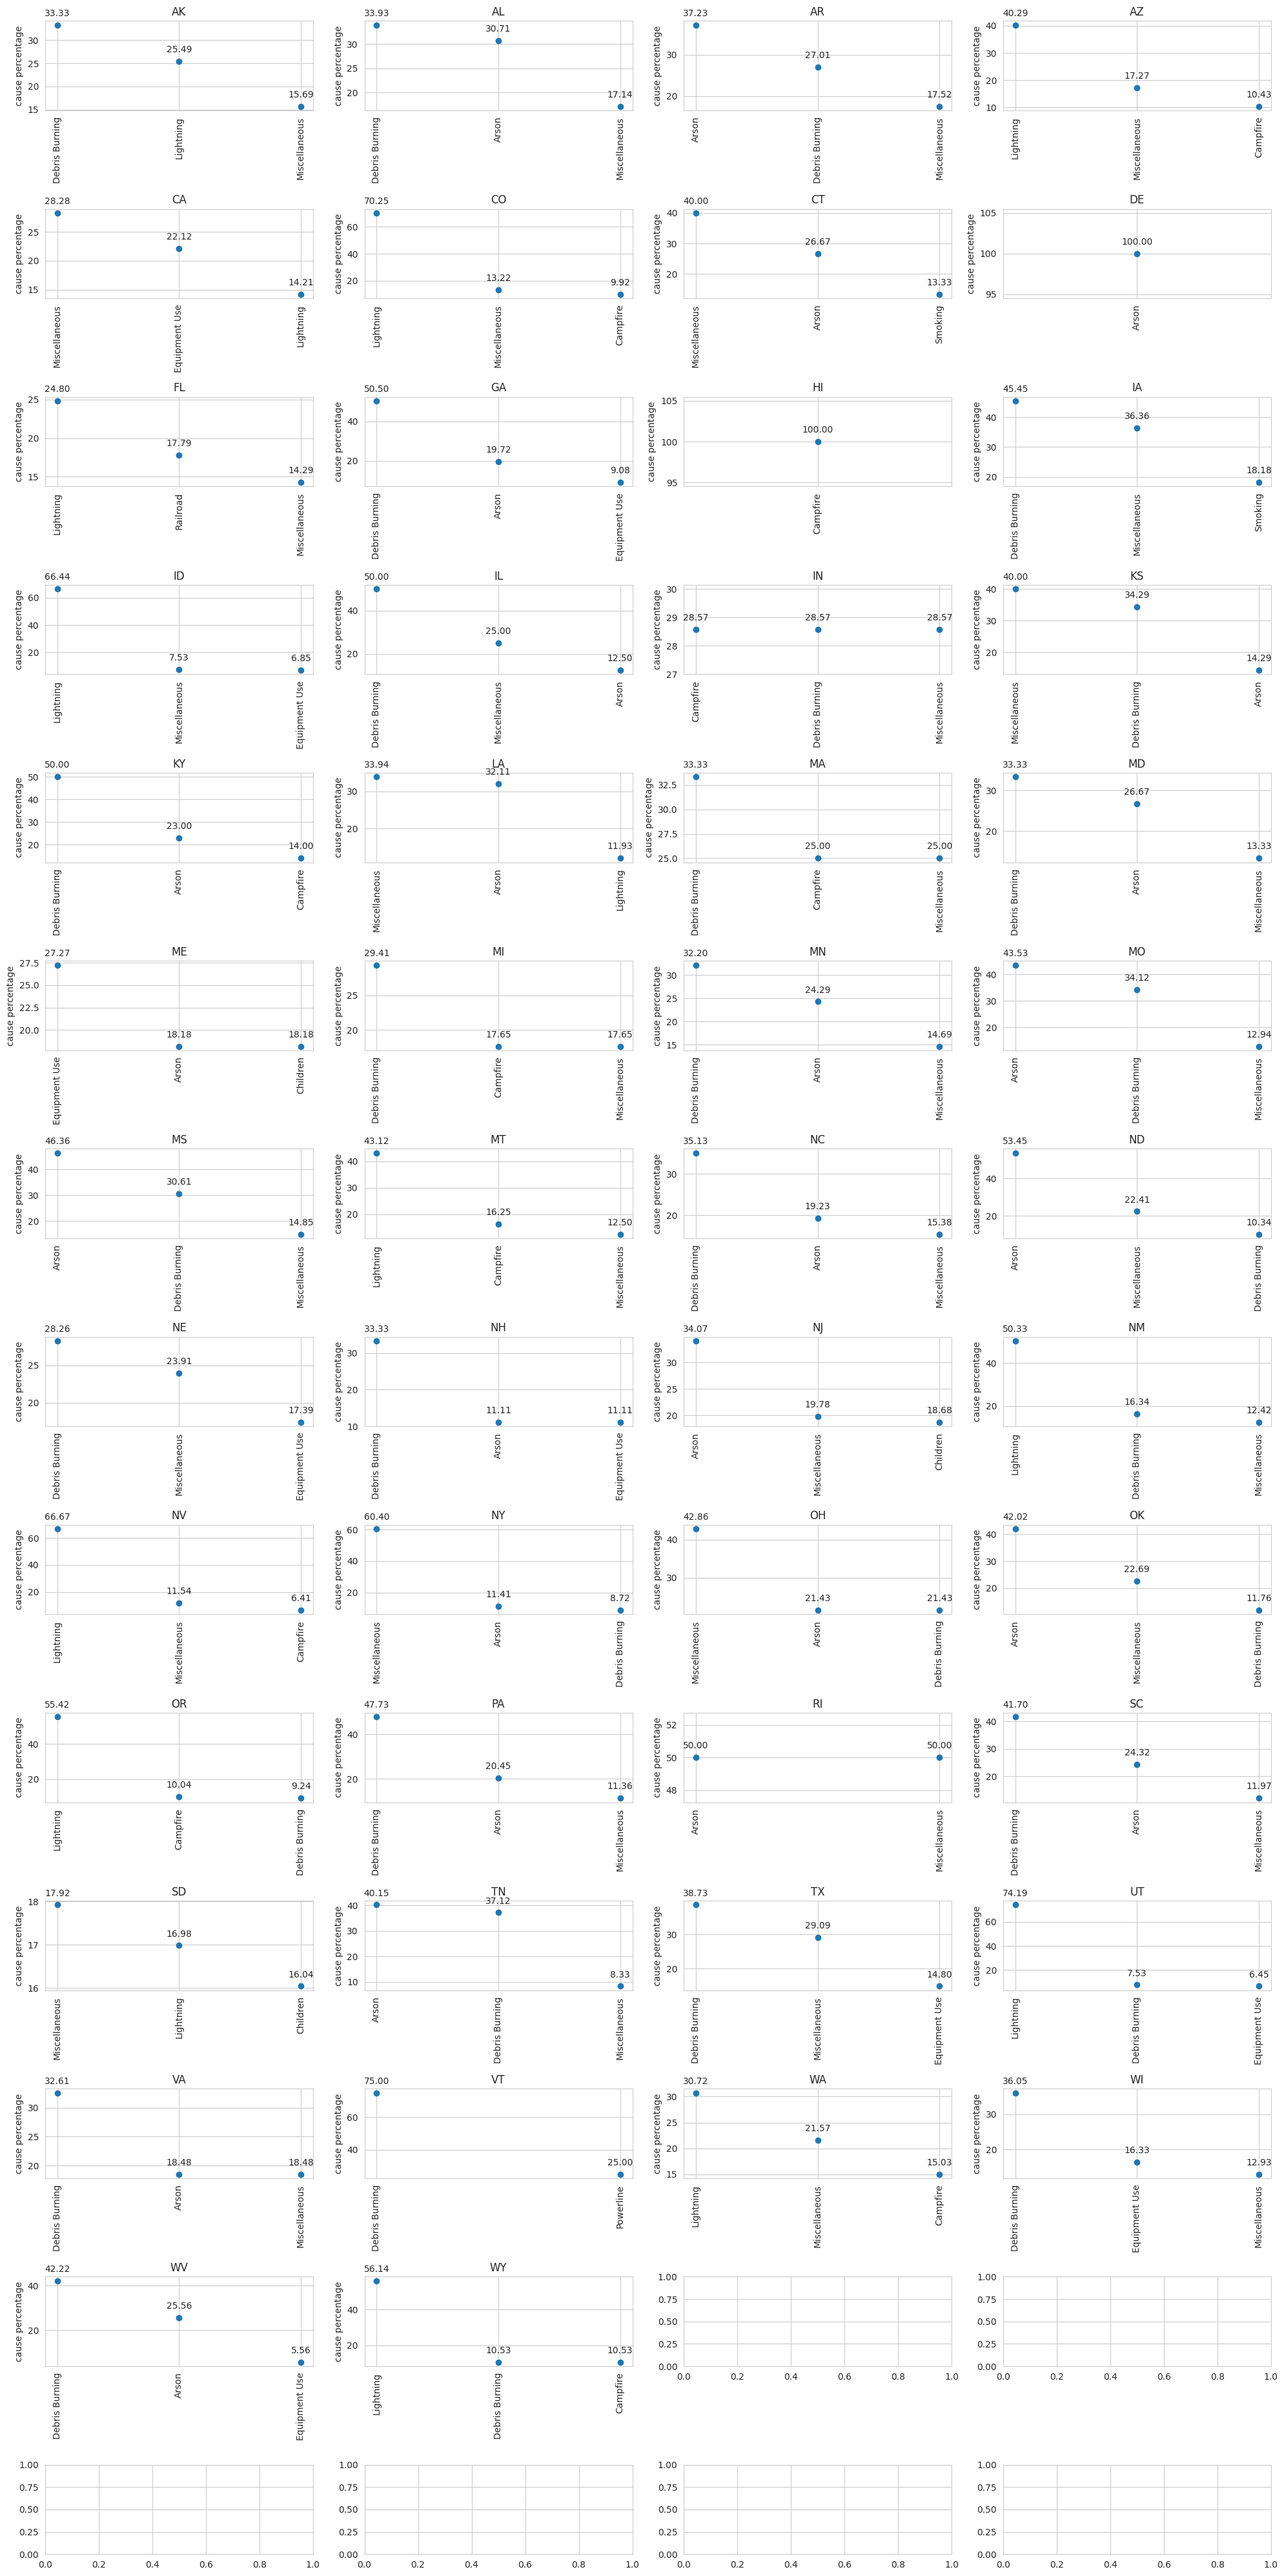

In [49]:
state_group = fire_cause_by_states.groupby("STATE")
fig, axs = plt.subplots(14, 4, figsize=(20, 40))
i = 0
for name_of_group, contents_of_group in state_group:
    contents_of_group=contents_of_group.sort_values(by='cause_percentage', ascending=False).head(3)
    row = i // 4
    col = i % 4
    axs[row, col].scatter(contents_of_group["FIRE_CAUSE"], contents_of_group["cause_percentage"])
    axs[row, col].set_title(name_of_group)
    axs[row, col].set_ylabel("cause percentage")
    axs[row, col].tick_params(axis='x', rotation=90)
    for x, y in zip(contents_of_group["FIRE_CAUSE"], contents_of_group["cause_percentage"]):
        axs[row, col].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    i += 1

plt.tight_layout()
plt.show()


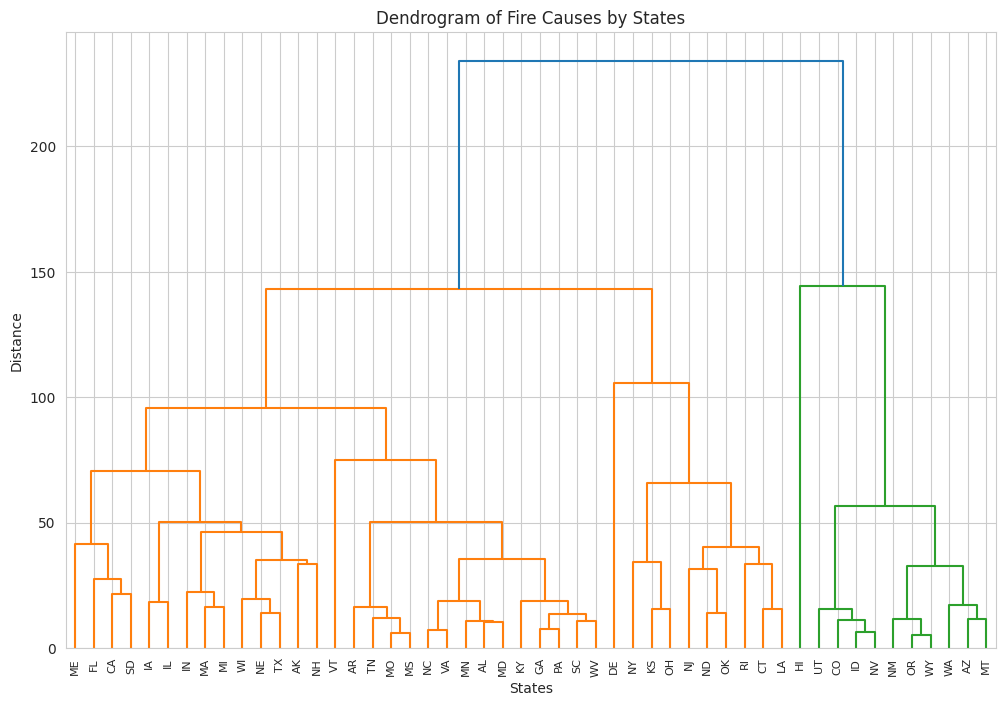

Optimal number of clusters: 9
Cluster 1: ['CA', 'FL', 'ME', 'SD']
Cluster 2: ['AK', 'IA', 'IL', 'IN', 'MA', 'MI', 'NE', 'NH', 'TX', 'WI']
Cluster 3: ['AL', 'AR', 'GA', 'KY', 'MD', 'MN', 'MO', 'MS', 'NC', 'PA', 'SC', 'TN', 'VA', 'WV']
Cluster 4: ['VT']
Cluster 5: ['KS', 'NY', 'OH']
Cluster 6: ['CT', 'LA', 'ND', 'NJ', 'OK', 'RI']
Cluster 7: ['DE']
Cluster 8: ['AZ', 'CO', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
Cluster 9: ['HI']


In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np
fire_cause_by_states = df.groupby(['STATE', 'FIRE_CAUSE']).size().reset_index(name='count')


total_counts_by_state = fire_cause_by_states.groupby('STATE')['count'].transform('sum')
fire_cause_by_states['cause_percentage'] = (fire_cause_by_states['count'] / total_counts_by_state) * 100
fire_cause_by_states['cause_percentage'] = fire_cause_by_states['cause_percentage'].round(2)
pd.DataFrame(fire_cause_by_states)


pivot = fire_cause_by_states.pivot(index='STATE', columns='FIRE_CAUSE', values='cause_percentage').fillna(0)

Z = linkage(pivot, method='ward')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram of Fire Causes by States')
plt.xlabel('States')
plt.ylabel('Distance')
dendrogram(Z, labels=pivot.index, leaf_rotation=90)
plt.show()

last_merges = Z[-10:, 2]
differences = np.diff(last_merges, 2)
optimal_num_clusters = differences.argmax() + 2
print("Optimal number of clusters:", optimal_num_clusters)

num_clusters = 9
clusters = fcluster(Z, num_clusters, criterion='maxclust')
clusters
cluster_dict = {cluster: [] for cluster in range(1, num_clusters + 1)}


for state, cluster in zip(pivot.index, clusters):
    cluster_dict[cluster].append(state)

for cluster, states in cluster_dict.items():
    print(f"Cluster {cluster}: {states}")


# Splitting into train & test, plus some initial cleaning of columns

In [51]:
feature_subset = ['SOURCE_SYSTEM_TYPE',
        'SOURCE_SYSTEM',
        'NWCG_REPORTING_AGENCY',
          "SOURCE_REPORTING_UNIT",
        "FIRE_CODE",
        'FIRE_YEAR',
        'DISCOVERY_TIME',
        'FIRE_SIZE_CLASS',
        'OWNER_CODE',
        'STATE',
        'COUNTY',
        'FIPS_CODE',
        "FIRE_SIZE",
        'DISCOVERY_DOY',
                  'DISCOVERY_DATE']
X = df[feature_subset]

y = df['FIRE_CAUSE']

categorical_features = ['SOURCE_SYSTEM_TYPE',
                        'SOURCE_SYSTEM',
                        'NWCG_REPORTING_AGENCY',
                        "SOURCE_REPORTING_UNIT",
                        "FIRE_CODE",
                        'STATE',
                        'COUNTY',
                        'FIPS_CODE',
                        "OWNER_CODE",
                        ]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:

X_train['FIPS_CODE'] = X_train['FIPS_CODE'].fillna("Unknown")
X_test['FIPS_CODE'] = X_test['FIPS_CODE'].fillna("Unknown")


X_train['COUNTY'] = X_train['COUNTY'].fillna("Unknown")
X_test['COUNTY'] = X_test['COUNTY'].fillna("Unknown")

In [54]:
object_columns = X_train.select_dtypes(include=['object']).columns
X_train[object_columns] = X_train[object_columns].astype(str)

X_train['OWNER_CODE'] = X_train['OWNER_CODE'].astype(int)


object_columns = X_test.select_dtypes(include=['object']).columns
X_test[object_columns] = X_test[object_columns].astype(str)

X_test['OWNER_CODE'] = X_test['OWNER_CODE'].astype(int)

In [55]:
# fill all with -1 to represent "unknown"
X_train['DISCOVERY_TIME'] = X_train['DISCOVERY_TIME'].fillna(-1)
X_test['DISCOVERY_TIME'] = X_test['DISCOVERY_TIME'].fillna(-1)

In [56]:
X_train.isna().sum()

SOURCE_SYSTEM_TYPE       0
SOURCE_SYSTEM            0
NWCG_REPORTING_AGENCY    0
SOURCE_REPORTING_UNIT    0
FIRE_CODE                0
FIRE_YEAR                0
DISCOVERY_TIME           0
FIRE_SIZE_CLASS          0
OWNER_CODE               0
STATE                    0
COUNTY                   0
FIPS_CODE                0
FIRE_SIZE                0
DISCOVERY_DOY            0
DISCOVERY_DATE           0
dtype: int64

In [57]:
X_train.columns

Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY',
       'SOURCE_REPORTING_UNIT', 'FIRE_CODE', 'FIRE_YEAR', 'DISCOVERY_TIME',
       'FIRE_SIZE_CLASS', 'OWNER_CODE', 'STATE', 'COUNTY', 'FIPS_CODE',
       'FIRE_SIZE', 'DISCOVERY_DOY', 'DISCOVERY_DATE'],
      dtype='object')

# Baseline model
---
in this section we will train a baseline model with all the features (as seen above we did remove some features but had a minimal removal policy). we trained with catboost algorithm, the model which we will use throughout the project, as it can handle the many categorical features well. we use catboost's default parameters.

In [58]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score


model = CatBoostClassifier(iterations = None, learning_rate=None, depth=None, l2_leaf_reg=None,
                           cat_features=categorical_features, loss_function='MultiClass', task_type="GPU",
                           devices='0')
model.fit(X_train, y_train)

Learning rate set to 0.090336
0:	learn: 2.3367839	total: 55.7ms	remaining: 55.7s
1:	learn: 2.2347194	total: 234ms	remaining: 1m 56s
2:	learn: 2.1401993	total: 316ms	remaining: 1m 45s
3:	learn: 2.0678253	total: 430ms	remaining: 1m 47s
4:	learn: 2.0092766	total: 500ms	remaining: 1m 39s
5:	learn: 1.9614509	total: 565ms	remaining: 1m 33s
6:	learn: 1.9152504	total: 589ms	remaining: 1m 23s
7:	learn: 1.8782926	total: 611ms	remaining: 1m 15s
8:	learn: 1.8435130	total: 634ms	remaining: 1m 9s
9:	learn: 1.8120194	total: 656ms	remaining: 1m 4s
10:	learn: 1.7831782	total: 691ms	remaining: 1m 2s
11:	learn: 1.7583010	total: 818ms	remaining: 1m 7s
12:	learn: 1.7372220	total: 905ms	remaining: 1m 8s
13:	learn: 1.7177667	total: 1s	remaining: 1m 10s
14:	learn: 1.7012204	total: 1.04s	remaining: 1m 8s
15:	learn: 1.6853022	total: 1.11s	remaining: 1m 8s
16:	learn: 1.6721184	total: 1.19s	remaining: 1m 8s
17:	learn: 1.6591666	total: 1.22s	remaining: 1m 6s
18:	learn: 1.6481476	total: 1.29s	remaining: 1m 6s
19:	l

In [59]:
y_pred_proba = model.predict_proba(X_test)
weighted_roc_auc = roc_auc_score(y_true = y_test, y_score = y_pred_proba, multi_class='ovr', average='weighted', sample_weight = None)
weighted_roc_auc

0.7851436483923304

# Feature Engineering
in this section we engineer a few new features: time_of_day_category - a categorization of the time the fire was discovered into one of 8 categories, is_holiday - representing whether the fire started on a holiday, and season - which season the fire started during.

## add part of the day catagory

In [60]:
def categorize_time_of_day(row):
    time = row["DISCOVERY_TIME"]
    if time == -1:
      return "Unknown"
    hour = int(time) // 100
    if 5 <= hour < 8:
         return "Early Morning"
    elif 8 <= hour < 12:
       return "Late Morning"
    elif 12 <= hour < 14:
        return "Noon"
    elif 14 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 20:
        return "Early Evening"
    elif 20 <= hour < 23:
        return "Late Evening"
    else:
        return "Night"

X_train["time_of_day_category"] = X_train.apply(categorize_time_of_day, axis=1)
X_test["time_of_day_category"] = X_test.apply(categorize_time_of_day, axis=1)



## add is_holiday

In [61]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


cal = calendar()
discovery_date = pd.to_datetime(X_train['DISCOVERY_DATE'], unit="D", origin="julian")
holidays_dates = cal.holidays(start=discovery_date.min(), end=discovery_date.max())

X_train['IS_HOLIDAY'] = discovery_date.isin(holidays_dates).astype(int)
X_train['IS_HOLIDAY']

cal = calendar()
discovery_date = pd.to_datetime(X_test['DISCOVERY_DATE'], unit="D", origin="julian")
holidays_dates = cal.holidays(start=discovery_date.min(), end=discovery_date.max())

X_test['IS_HOLIDAY'] = discovery_date.isin(holidays_dates).astype(int)

In [62]:
## Add season
def get_season(day_of_year):
    if day_of_year < 1 or day_of_year > 365:
        return "Invalid day of the year"
    elif day_of_year >= 1 and day_of_year <= 90:
        return "Winter"
    elif day_of_year >= 91 and day_of_year <= 181:
        return "Spring"
    elif day_of_year >= 182 and day_of_year <= 273:
        return "Summer"
    else:
        return "Fall"

X_train["SEASON"] = X_train["DISCOVERY_DOY"].apply(get_season)
X_test["SEASON"] = X_test["DISCOVERY_DOY"].apply(get_season)

## Run Model after feature engeniring


---
we will run the baseline model again but this time with the additional engineered features.



In [63]:
categorical_features = ['SOURCE_SYSTEM_TYPE',
                        'SOURCE_SYSTEM',
                        'NWCG_REPORTING_AGENCY',
                        "SOURCE_REPORTING_UNIT",
                        "FIRE_CODE",
                        'STATE',
                        'COUNTY',
                        'FIPS_CODE',
                        "OWNER_CODE",
                        # new features added
                        "SEASON",
                        "time_of_day_category",
                        'IS_HOLIDAY'
                        ]

In [64]:
X_train[categorical_features] = X_train[categorical_features].astype('category')
X_test[categorical_features] = X_test[categorical_features].astype('category')

In [65]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score


model = CatBoostClassifier(iterations = None, learning_rate=None, depth=None, l2_leaf_reg=None,
                           cat_features=categorical_features, loss_function='MultiClass', task_type="GPU",
                           devices='0')
model.fit(X_train, y_train)


Learning rate set to 0.090336
0:	learn: 2.3313116	total: 15.8ms	remaining: 15.8s
1:	learn: 2.2208576	total: 29.5ms	remaining: 14.7s
2:	learn: 2.1335926	total: 42.8ms	remaining: 14.2s
3:	learn: 2.0617237	total: 56.2ms	remaining: 14s
4:	learn: 2.0031226	total: 73.4ms	remaining: 14.6s
5:	learn: 1.9534549	total: 86.3ms	remaining: 14.3s
6:	learn: 1.9114488	total: 124ms	remaining: 17.6s
7:	learn: 1.8730907	total: 174ms	remaining: 21.6s
8:	learn: 1.8392973	total: 207ms	remaining: 22.8s
9:	learn: 1.8099943	total: 263ms	remaining: 26s
10:	learn: 1.7843636	total: 304ms	remaining: 27.3s
11:	learn: 1.7609189	total: 340ms	remaining: 28s
12:	learn: 1.7385430	total: 396ms	remaining: 30.1s
13:	learn: 1.7194204	total: 440ms	remaining: 31s
14:	learn: 1.7026253	total: 485ms	remaining: 31.8s
15:	learn: 1.6862606	total: 530ms	remaining: 32.6s
16:	learn: 1.6713201	total: 577ms	remaining: 33.3s
17:	learn: 1.6589201	total: 629ms	remaining: 34.3s
18:	learn: 1.6471005	total: 681ms	remaining: 35.1s
19:	learn: 1.

In [66]:
y_pred_proba = model.predict_proba(X_test)
weighted_roc_auc_baseline_after_feature_eng = roc_auc_score(y_true = y_test, y_score = y_pred_proba, multi_class='ovr', average='weighted', sample_weight = None)
weighted_roc_auc_baseline_after_feature_eng

0.7885511318638961

# Discovering feature importance from baseline model, and trying to remove features


---
in this section we will see how different features impact the model, and see if there are any features we should remove.

---

first of all we will run feature importance for the model that was trained with the engineered features

---
then we took all features with an importance > 1.5, and tried all combinations of adding in the remaining features.
Initially we had a higher threshold > 3, and of the remaining features with lower importance we chose random subsets, but we saw that the model’s performance went down, so we decided to lower the threshold.

we will take forward the most beneficial subset of features.



In [67]:
from catboost import Pool
feature_importance = model.get_feature_importance(Pool(X_train, label=y_train, cat_features=categorical_features))

sorted_idx = feature_importance.argsort()[::-1]

feature_names = X_train.columns

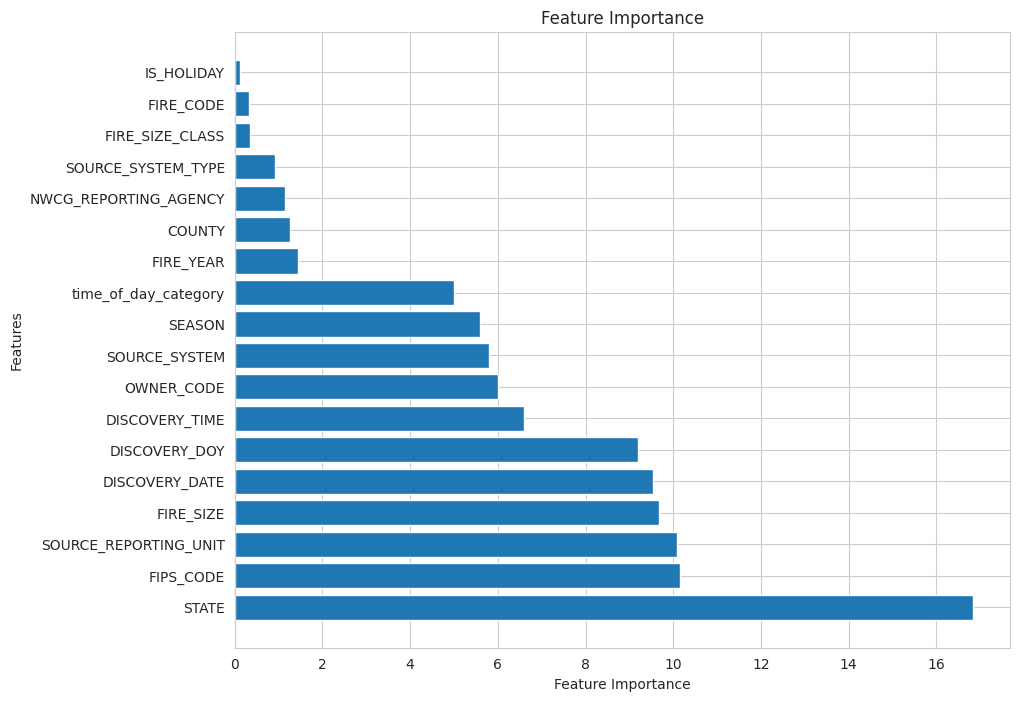

In [68]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [69]:
feature_names = X_train.columns

for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}")

STATE: 16.831383254307877
FIPS_CODE: 10.157013545696087
SOURCE_REPORTING_UNIT: 10.077958459915326
FIRE_SIZE: 9.684684486830452
DISCOVERY_DATE: 9.5474198766674
DISCOVERY_DOY: 9.19563281492462
DISCOVERY_TIME: 6.589318521883089
OWNER_CODE: 5.9979121871202645
SOURCE_SYSTEM: 5.793175895104256
SEASON: 5.588219544857248
time_of_day_category: 4.998380625028031
FIRE_YEAR: 1.4394316714761524
COUNTY: 1.2692227344860034
NWCG_REPORTING_AGENCY: 1.1366433870552735
SOURCE_SYSTEM_TYPE: 0.9220258519383033
FIRE_SIZE_CLASS: 0.33856992313748463
FIRE_CODE: 0.32487414220090605
IS_HOLIDAY: 0.1081330773712348


In [70]:
baseline_features = [feat for feat, imp in zip(feature_names, feature_importance) if imp > 1.5]

feature_names_list = list(feature_names)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("feature_names_list:", feature_names_list)

X_train shape: (5056, 18)
X_test shape: (2168, 18)
feature_names_list: ['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT', 'FIRE_CODE', 'FIRE_YEAR', 'DISCOVERY_TIME', 'FIRE_SIZE_CLASS', 'OWNER_CODE', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIRE_SIZE', 'DISCOVERY_DOY', 'DISCOVERY_DATE', 'time_of_day_category', 'IS_HOLIDAY', 'SEASON']


In [71]:
print("Data types of columns in X_train:")
print(X_train.dtypes)

print("\nData types of columns in X_test:")
print(X_test.dtypes)


Data types of columns in X_train:
SOURCE_SYSTEM_TYPE       category
SOURCE_SYSTEM            category
NWCG_REPORTING_AGENCY    category
SOURCE_REPORTING_UNIT    category
FIRE_CODE                category
FIRE_YEAR                   int64
DISCOVERY_TIME            float64
FIRE_SIZE_CLASS             int64
OWNER_CODE               category
STATE                    category
COUNTY                   category
FIPS_CODE                category
FIRE_SIZE                 float64
DISCOVERY_DOY               int64
DISCOVERY_DATE            float64
time_of_day_category     category
IS_HOLIDAY               category
SEASON                   category
dtype: object

Data types of columns in X_test:
SOURCE_SYSTEM_TYPE       category
SOURCE_SYSTEM            category
NWCG_REPORTING_AGENCY    category
SOURCE_REPORTING_UNIT    category
FIRE_CODE                category
FIRE_YEAR                   int64
DISCOVERY_TIME            float64
FIRE_SIZE_CLASS             int64
OWNER_CODE               category


In [72]:
from itertools import combinations
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def select_best_features(feature_names, feature_importance, X_train, X_test, y_train, y_test):

    baseline_features = [feat for feat, imp in zip(feature_names, feature_importance) if imp > 1.5]

    best_score = 0
    best_feature_subset = []


    for r in range(1, len(feature_names) - len(baseline_features) + 1):
        for combo in combinations(set(feature_names) - set(baseline_features), r):
            candidate_features = baseline_features + list(combo)

            catboost_model = CatBoostClassifier(cat_features=[c for c in categorical_features if c in candidate_features],
                                                task_type="GPU", devices='0')
            catboost_model.fit(X_train[candidate_features], y_train)


            y_pred_proba = catboost_model.predict_proba(X_test[candidate_features])


            weighted_roc_auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba, multi_class='ovr', average='weighted')


            print("Additional Features:", combo)
            print("Weighted ROC AUC:", weighted_roc_auc)
            print("---------------------------")

            if weighted_roc_auc > best_score:
                best_score = weighted_roc_auc
                best_feature_subset = candidate_features
                print(f"new best score is {best_score}")
                print(f"best feature subset is {best_feature_subset}")

    return best_feature_subset, best_score


In [ ]:
best_feature_subset, best_score = select_best_features(feature_names, feature_importance, X_train, X_test, y_train, y_test)

Streaming output truncated to the last 5000 lines.
992:	learn: 0.5310223	total: 33.3s	remaining: 235ms
993:	learn: 0.5304417	total: 33.3s	remaining: 201ms
994:	learn: 0.5300691	total: 33.4s	remaining: 168ms
995:	learn: 0.5294246	total: 33.5s	remaining: 135ms
996:	learn: 0.5291622	total: 33.6s	remaining: 101ms
997:	learn: 0.5288062	total: 33.6s	remaining: 67.4ms
998:	learn: 0.5284282	total: 33.7s	remaining: 33.7ms
999:	learn: 0.5281095	total: 33.7s	remaining: 0us
Additional Features: ('COUNTY',)
Weighted ROC AUC: 0.7872484840764098
---------------------------
new best score is 0.7872484840764098
best feature subset is ['SOURCE_SYSTEM', 'SOURCE_REPORTING_UNIT', 'DISCOVERY_TIME', 'OWNER_CODE', 'STATE', 'FIPS_CODE', 'FIRE_SIZE', 'DISCOVERY_DOY', 'DISCOVERY_DATE', 'time_of_day_category', 'SEASON', 'COUNTY']
Learning rate set to 0.090336
0:	learn: 2.3418108	total: 76.8ms	remaining: 1m 16s
1:	learn: 2.2322030	total: 150ms	remaining: 1m 14s
2:	learn: 2.1479287	total: 219ms	remaining: 1m 12s
3:

In [ ]:
best_feature_subset, best_score

# Hyperparameter tuning
in this section we will tune catboost's hyperparameters to reach the optimal ones for the task with our features.

In [ ]:
!pip install optuna

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from scipy.stats import randint


param_distributions = {
    'iterations': randint(500, 1500),
    'learning_rate': [0.002, 0.003],
    'depth': [4, 6, 8]
}


model = CatBoostClassifier(cat_features=categorical_features, verbose=3, task_type = "GPU")


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=10, scoring='roc_auc_ovr_weighted', verbose=3, random_state=42)


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found:", best_params)
print("Best ROC AUC score found:", best_score)



# FINAL MODEL

the best model we found was the model with all the engineered features and the deafult parameters.

In [ ]:
categorical_features = ['SOURCE_SYSTEM_TYPE',
                        'SOURCE_SYSTEM',
                        'NWCG_REPORTING_AGENCY',
                        "SOURCE_REPORTING_UNIT",
                        "FIRE_CODE",
                        'STATE',
                        'COUNTY',
                        'FIPS_CODE',
                        "OWNER_CODE",
                        "SEASON",
                        "time_of_day_category",
                        'IS_HOLIDAY'
                        ]

In [ ]:
X_train[categorical_features] = X_train[categorical_features].astype('category')
X_test[categorical_features] = X_test[categorical_features].astype('category')

from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score


model = CatBoostClassifier(iterations = None, learning_rate=None, depth=None, l2_leaf_reg=None,
                           cat_features=categorical_features, loss_function='MultiClass', task_type="GPU",
                           devices='0')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
final_score = roc_auc_score(y_true = y_test, y_score = y_pred_proba, multi_class='ovr', average='weighted', sample_weight = None)
final_score